## House Prices: Advanced Regression Techniques

This is an exercise of google's House prediction project.
    Althought, House prices prediction is a simply project that the beginner know all too well. But the Google give as a challenge for this project. 
    There are a lot of variables to gradually consider and use some techniqes as much as possible like the real project
    
### Competition Description

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import all files to notebook

In [2]:
train = pd.read_csv('../ML-projects/data/train.csv',index_col = 'Id')
test = pd.read_csv('../ML-projects/data/test.csv',index_col = 'Id')
ans = pd.read_csv('../ML-projects/data/sample_submission.csv',index_col = 'Id')

FileNotFoundError: [Errno 2] File b'../ML-projects/data/train.csv' does not exist: b'../ML-projects/data/train.csv'

In [ ]:
#explore ans's header
ans.head()

In [ ]:
test.head()

### Merge dataframe

Label and variable for test set were seperate into two table
Then we might merge them into one table by referent to their ID column

#### using pandas merge function for merge 2 table by columns
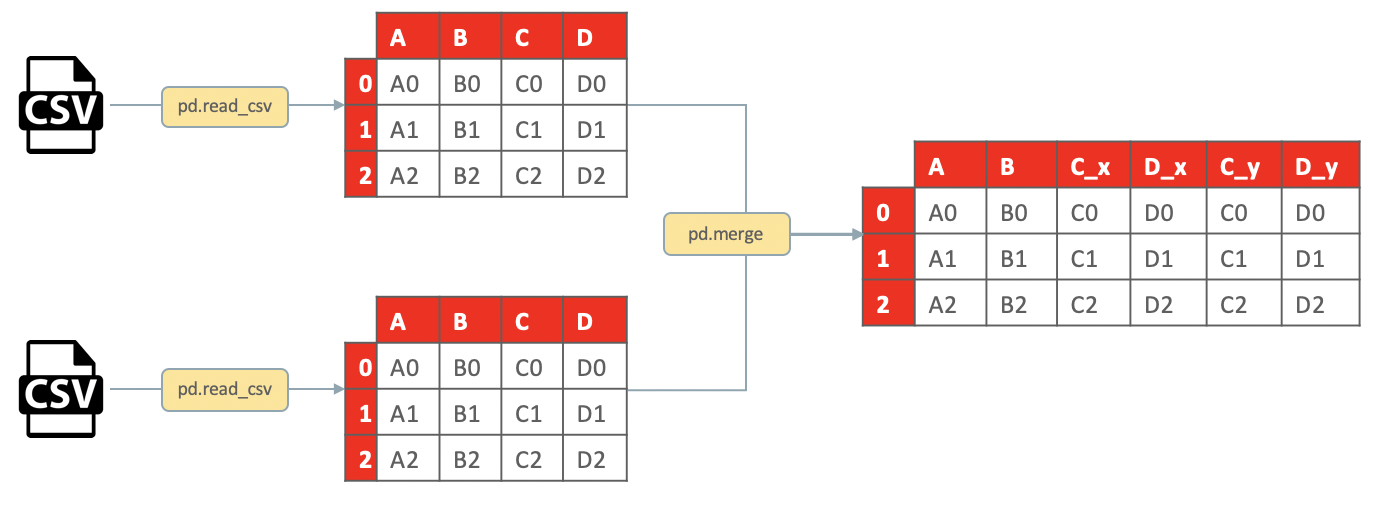

In [ ]:
test = pd.merge(test,ans,on= 'Id')
test.head()

In [ ]:
train.head()

In [ ]:
train.info()

### before building machine learning model
Honestly, The exploding dataset into the dataframe isn't enough to get the idea to build the machine leaning model. Despite, the easy way to end the projects are use every item in your data to build model 


In [ ]:
#obsercation null variable by Heat map visualization
plt.figure(figsize = (11,7))
sns.heatmap(train.isnull())

In [ ]:
test.info()

In [ ]:
#obsercation null variable by Heat map visualization
plt.figure(figsize = (10,6))
sns.heatmap(test.isnull())

### Feature selection

The most important technic to tuning model is feature selection.
In order to drop variable that to much nonnull variable

### delete the columns contain nonnull over than 30% 

If there are too many nonnull variable. They unusable for prediction.


In [ ]:
null = []
for i in train.columns:
    val = pd.value_counts(train[i].isnull())
    if val[0] == train.shape[0]:
        continue
    else:
        div = val[0]/val[1]
        if div <= 0.3:
            null.append(i)
        else:
            continue

In [ ]:
null

In [ ]:
delete_col = ['Alley','PoolQC','Fence','MiscFeature','FireplaceQu','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']

In [ ]:
train_delete_col = train.drop(delete_col,axis=1,)
test_delete_col = test.drop(delete_col,axis=1)

In [ ]:
train_clean = train_delete_col.dropna()
test_clean = test_delete_col.dropna()

In [ ]:
train_clean.info()

In [ ]:
#Explore NA number in Data
sns.heatmap(train_clean.isnull())

In [ ]:
#Explore object types columns
object_col = train_clean.select_dtypes(include='object').columns
print(object_col)

In [ ]:
#create label encoder function
from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
encoder_data = []
def encoder(data):
    data_col = data.columns
    data_index = data.index
    row = data.shape[0]
    columns = data.shape[1]
    le = LabelEncoder()
    for i in data.columns:
        encoder_data.append(le.fit_transform(data[i]))
    return pd.DataFrame(np.reshape(np.array(encoder_data),(row,columns)),columns=data_col,index=data_index) 

In [ ]:
train_obj_encoder = encoder(train_clean[object_col])
#test_obj_encoder = encoder(test_clean[object_col])

In [ ]:
train_completely_clean = pd.merge(train_clean.drop(columns = object_col),train_obj_encoder,how='inner',on = 'Id')

In [ ]:
test_obj_encoder = encoder(test_clean[object_col])
test_completely_clean = pd.merge(test_clean.drop(columns = object_col),test_obj_encoder,how='inner',on = 'Id')

In [ ]:
data_corr = train_completely_clean.corr()
key = data_corr['SalePrice'][data_corr.SalePrice>0.3].keys()

In [ ]:
plt.figure(figsize = (16,11))
sns.pairplot(train_completely_clean)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X_train = train_completely_clean[['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]
y_train = train_completely_clean['SalePrice']

X_test = test_completely_clean[['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]
y_test = test_completely_clean['SalePrice']

In [ ]:
data_corr['SalePrice'][data_corr.SalePrice>0.3]

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)

In [ ]:
y_pred = lm.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error , mean_absolute_error ,r2_score
case1_mse = mean_squared_error(y_test,y_pred)
case1_mae = mean_absolute_error(y_test,y_pred)
case1_r2  = r2_score(y_test,y_pred)
print(case1_mse)
print(case1_mae)
print(case1_r2)

# Linear regression with all variable

In [ ]:
X_train_allvar = train_completely_clean.drop(columns='SalePrice')
y_train_allvar = train_completely_clean['SalePrice']

X_test_allvar = test_completely_clean.drop(columns='SalePrice')
y_test_allvar = test_completely_clean['SalePrice']

In [ ]:
from sklearn.preprocessing import StandardScaler,Normalizer
scale = StandardScaler()
X_train_allvar = scale.fit_transform(X_train_allvar)
X_test_allvar  = scale.fit_transform(X_test_allvar)

In [ ]:
lm_allvar = LinearRegression()
lm_allvar.fit(X_train_allvar,y_train_allvar)

In [ ]:
y_pred_allvar = lm_allvar.predict(X_test_allvar)

In [ ]:
case2_mse = mean_squared_error(y_test_allvar,y_pred_allvar)
case2_mae = mean_absolute_error(y_test_allvar,y_pred_allvar)
case2_r2 = r2_score(y_pred_allvar,y_test_allvar)
print(case2_mse)
print(case2_mae)
print(case2_r2)

### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train_allvar,y_train_allvar)
ytree_pred = tree.predict(X_test_allvar)
tree_mse = mean_squared_error(ytree_pred,y_test_allvar)
tree_mae = mean_absolute_error(ytree_pred,y_test_allvar)
tree_r2 = r2_score(ytree_pred,y_test_allvar)
print(tree_mse)
print(tree_mae)
print(tree_r2)